# Example 2: Modeling communication in a discussion forum

Here we attempt to model communication flow in a MOOC's discussion forum, based on participants' posting activity.
#Data
We provide a file with the students' posting activity in the forum: the students are portrayed in rows and the post messages in columns. For example, if you print the data you will see that the student with user id (uid) 3992067770 has interacted (either posted or replied) with posts X4, X7, X15, X62 and X64.

In [13]:
#import all the necessary libraries
library("network")

network: Classes for Relational Data
Version 1.13.0.1 created on 2015-08-31.
copyright (c) 2005, Carter T. Butts, University of California-Irvine
                    Mark S. Handcock, University of California -- Los Angeles
                    David R. Hunter, Penn State University
                    Martina Morris, University of Washington
                    Skye Bender-deMoll, University of Washington
 For citation information, type citation("network").
 Type help("network-package") to get started.



In [28]:
#read and prepare the data into the dataframe named forum
forum = read.csv("./forum.csv")
rownames(forum)<- forum[,1]
forum[,1] <- NULL
forum# Example 1: Student modelling & prediction


,X3,X4,X7,X8,X15,X18,X25,X62,X64,X5
3992067770,0,1,1,0,1,0,0,1,1,0
7849522082,0,0,0,0,0,1,0,0,0,0
8489183117,0,1,0,0,1,0,1,0,0,0
3553169501,0,0,0,0,1,0,0,0,1,0
9149558034,0,0,0,0,0,0,0,0,0,0
1176916844,0,0,0,0,0,0,0,0,0,0
7869871483,0,0,0,0,0,0,0,0,0,0
6085930449,0,0,0,0,0,0,0,0,0,0
695741812,0,0,0,0,0,0,0,0,0,0
9457719429,0,0,0,0,0,0,0,0,0,0


In [33]:
#prepare the association matrix and print out the 10 first rows and 10 first columns

forum = as.matrix(forum)
forum_am = forum %*%t(forum)
forum_am[1:10,1:10]

,3992067770,7849522082,8489183117,3553169501,9149558034,1176916844,7869871483,6085930449,695741812,9457719429
3992067770,117,0,2,2,0,0,0,0,0,0
7849522082,0,3,0,0,0,0,0,0,0,0
8489183117,2,0,3,1,0,0,0,0,0,0
3553169501,2,0,1,3,0,0,0,0,0,0
9149558034,0,0,0,0,1,0,0,0,0,0
1176916844,0,0,0,0,0,1,0,0,0,0
7869871483,0,0,0,0,0,0,1,0,0,0
6085930449,0,0,0,0,0,0,0,1,0,0
695741812,0,0,0,0,0,0,0,0,2,0
9457719429,0,0,0,0,0,0,0,0,0,2


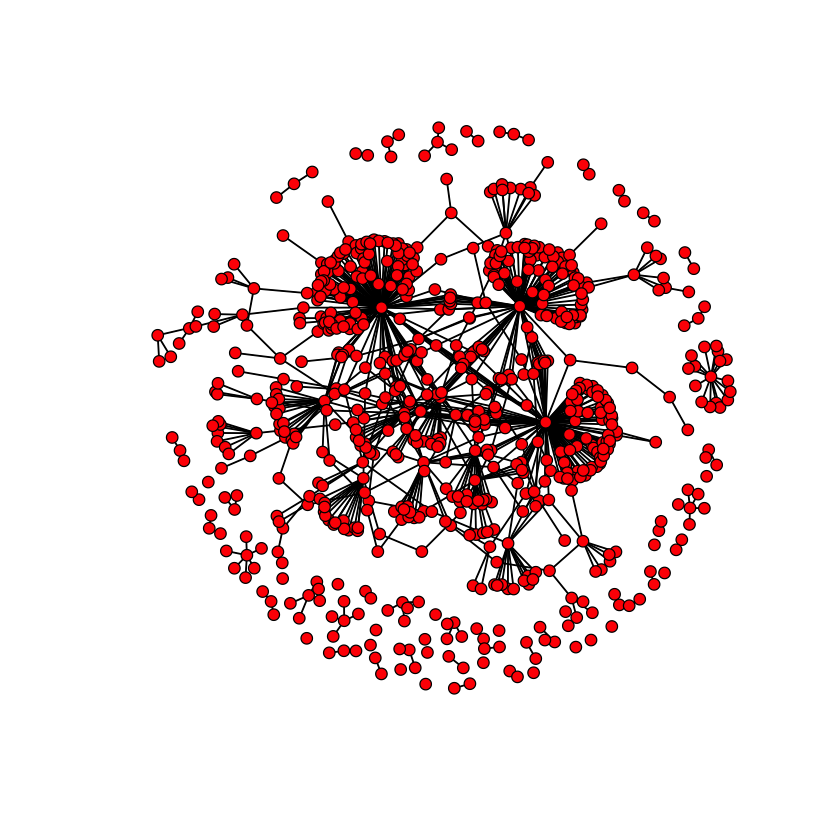

In [24]:
#create the graph (network) from the association matrix and save it with the name net
net <- network(forum)

#plot the network! users are nodes, user interactions are edges!
plot(net)


In [27]:
#print out an overview of this network's parameters and metrics
summary(net)
network.density(net)
network.edgecount(net)
network.size(net)


[1] 0.002932418

[1] 776

[1] 728

by the way... we can plot the students' names on the network nodes. it just doesn't look nice in this example ;)

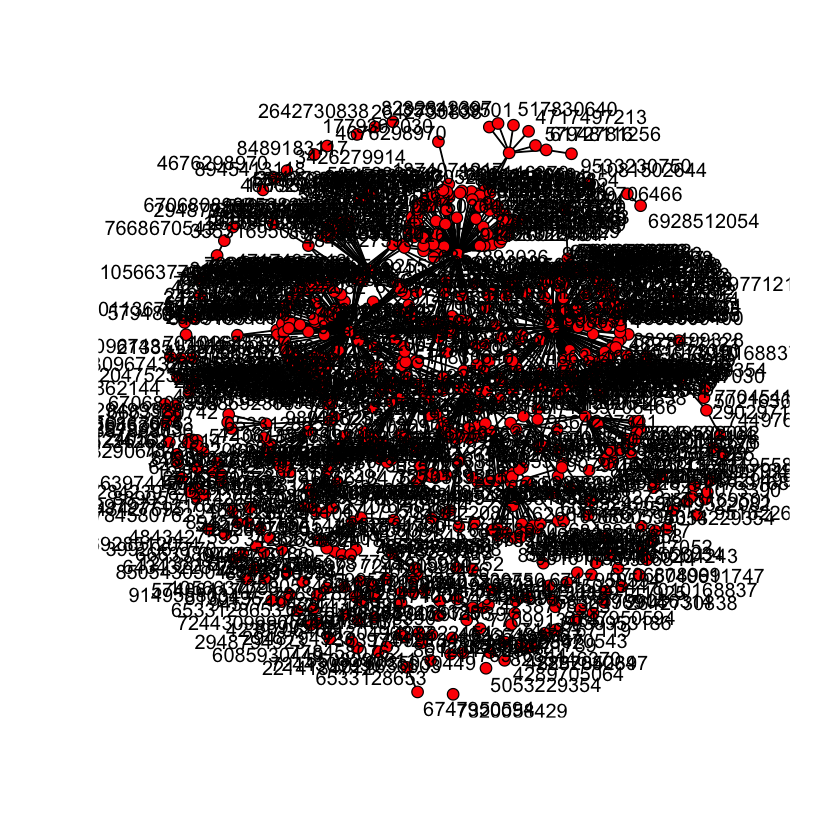

In [31]:
users = rownames(forum)
network.vertex.names(net) = users
plot.network(net, displaylabels = T)